In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/인공지능과미래사회/archive (3)/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/인공지능과미래사회/archive (3)/sign_mnist_test/sign_mnist_test.csv')

In [20]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [21]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [8]:
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

Epoch 1/10
344/344 [==============================] - 23s 61ms/step - loss: 2.3008 - accuracy: 0.2941 - val_loss: 0.9152 - val_accuracy: 0.7538
Epoch 2/10
344/344 [==============================] - 18s 53ms/step - loss: 0.9140 - accuracy: 0.6963 - val_loss: 0.3388 - val_accuracy: 0.9272
Epoch 3/10
344/344 [==============================] - 20s 58ms/step - loss: 0.5507 - accuracy: 0.8145 - val_loss: 0.1764 - val_accuracy: 0.9718
Epoch 4/10
344/344 [==============================] - 35s 103ms/step - loss: 0.3847 - accuracy: 0.8656 - val_loss: 0.0884 - val_accuracy: 0.9869
Epoch 5/10
344/344 [==============================] - 18s 54ms/step - loss: 0.2883 - accuracy: 0.9004 - val_loss: 0.0448 - val_accuracy: 0.9989
Epoch 6/10
344/344 [==============================] - 20s 58ms/step - loss: 0.2295 - accuracy: 0.9220 - val_loss: 0.0281 - val_accuracy: 0.9998
Epoch 7/10
344/344 [==============================] - 23s 66ms/step - loss: 0.1865 - accuracy: 0.9358 - val_loss: 0.0180 - val_accuracy

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

225/225 [==============================] - 3s 11ms/step - loss: 0.1556 - accuracy: 0.9564
Test accuracy: 0.9563580751419067


In [15]:
model.save('/content/drive/MyDrive/인공지능과미래사회/sign_mnist_model04.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


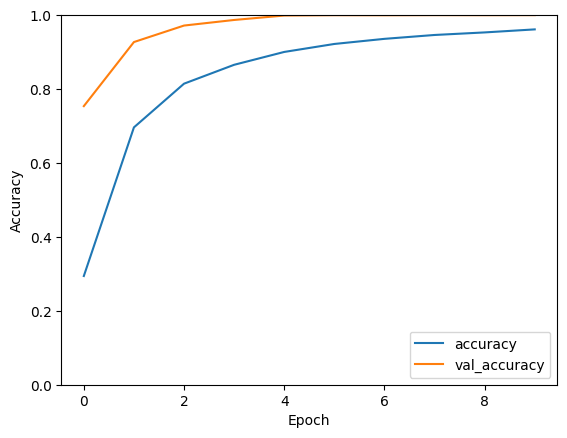

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

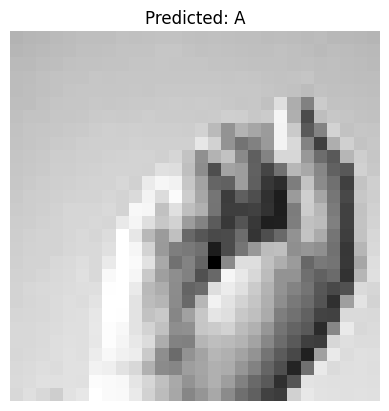

In [23]:
i = random.randint(1, X_test.shape[0] - 1)
plt.imshow(X_test[i].reshape((28, 28)), cmap='gray')
label_index = np.argmax(y_test[i])
plt.title(f"Predicted: {class_names[label_index]}")
plt.axis('off')
plt.show()